<h3><center>Alex Morel</center></h3>

# <h1><center>Gauss-Newton estimation procedure for first order Moving Average</center></h1>

### 1. The model

Consider the following model:

$$Y_t = \theta W_{t-1} + W_t$$

for $|\theta| < 1$ and $W_t$ is a Gaussian white noise, with $E(W_t)=0$ and $V(W_t)=1$, for every t $\in \mathbb{Z}$.

### 2. Theoretical aspects

Assume we are given a random sample $(Y_1, Y_2,..., Y_n)$ from our model and define

$$W_t(\theta) = Y_t - \theta W_{t-1}(\theta)$$

Such that the conditional sum of squared errors is

$$S_c(\theta) = \sum_{t=1}^{n} W_t^2(\theta)$$

Now let us consider the function $w_t(\theta) = y_t - \theta w_{t-1}(\theta)$ and use the Taylor expansion series of first order around $\theta_0$ in order to approximate the function to obtain:

$$w_t(\theta) = w_t(\theta_0) + (\theta - \theta_0) \left(\frac{\partial{w_t(\theta)}}{\partial{\theta}}\Big|_{\theta=\theta_0}\right) + \epsilon_1$$

After substituting this approximation in our conditional sum of squared error $S_c(\theta)$ and rearranging the terms we get

$$S_c(\theta) = Q_c(\theta) + \epsilon_2$$

Where:

$$Q_c(\theta)= \sum_{t=1}^n \left[w_t(\theta_0)+(\theta-\theta_0)\left(\frac{\partial w_t(\theta)}{\partial\theta}\Big|_{\theta=\theta_0}\right)\right]^2$$

Let $(\theta-\theta_0)$ be the minimizer of $Q_c(\theta)$ such that $\frac{\partial Q_c(\theta)}{\partial(\theta-\theta_0)}=0$, after some algebra, we have

$$\widehat{(\theta-\theta_0)} = \left[\sum_{t=1}^n \left(\frac{\partial w_t(\theta)}{\partial\theta}\Big|_{\theta=\theta_0}\right)^2 \right]^{-1} \left[-\sum_{t=1}^n w_t(\theta_0)\left(\frac{\partial w_t(\theta)}{\partial\theta}\Big|_{\theta=\theta_0}\right)\right]$$

Now compute the partial derivative $\left(\frac{\partial w_t(\theta)}{\partial\theta}\Big|_{\theta=\theta_{j}}\right)$:

$$
\begin{align}
\left(\frac{\partial w_t(\theta)}{\partial\theta}\Big|_{\theta=\theta_{j}}\right) & = \frac{\partial (y_t - \theta w_{t-1}(\theta))}{\partial\theta}\Big|_{\theta=\theta_{j}}\\
& = -w_{t-1}(\theta_j) - \theta_j\left(\frac{\partial w_{t-1}(\theta)}{\partial\theta}\Big|_{\theta=\theta_{j}}\right)\\
& = -w_{t-1}(\theta_j) + \theta_j w_{t-2}(\theta_j) + \theta_j^2\left(\frac{\partial w_{t-2}(\theta)}{\partial\theta}\Big|_{\theta=\theta_{j}}\right)\\
& = -\sum_{i=1}^t (-\theta_{j})^{i-1}w_{t-i}(\theta_{j})
\end{align}
$$

Then, the final expression of our minimizer $\widehat{(\theta-\theta_j)}$ is:

$$\widehat{(\theta-\theta_j)} = \left[\sum_{t=1}^n \Big(-\sum_{i=1}^t (-\theta_{j})^{i-1}w_{t-i}(\theta_{j})\Big)^2 \right]^{-1} \left[-\sum_{t=1}^n  w_t(\theta_0) \Big( -\sum_{i=1}^t (-\theta_{j})^{i-1}w_{t-i}(\theta_{j}) \Big)\right]$$

Finally, the Gauss-Newton estimator of $\theta$ is achieved by iterating the following process:

$$\theta_{j+1}=\theta_{j} + \widehat{(\theta-\theta_{j})}$$

until convergence, namely until $|\theta_{j+1}-\theta_{j}|<\varepsilon$, for a selected $\varepsilon>0$.

### 3. Empirical application

To empirically assess the performance of our Gauss-Newton estimator, we will simulate a trajectory for the model with the following inputs:

- Sample size $n=2000$
- True value of $\theta = 0.7$

Here is the trajectory:

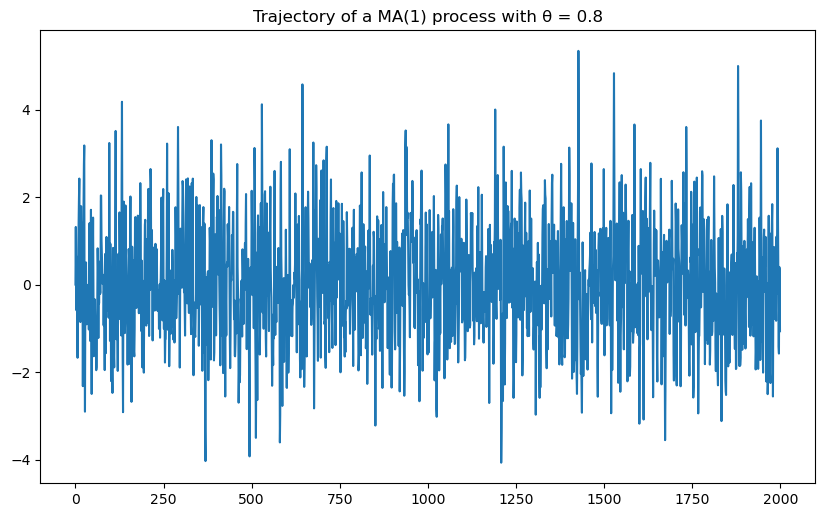

In [255]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(6942)

n_obs = 2000
true_theta = 0.8

w = np.random.normal(0, 1, n_obs)
y = [0] * n_obs
w[0] = y[0]

for t in range(1, n_obs):
    y[t] = true_theta * w[t-1] + w[t]

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y)
plt.title(f"Trajectory of a MA(1) process with \u03B8 = {true_theta}")
plt.show()

Now let's write our Gauss-Newton algorithm that takes as input:
- A vector of values derived from a MA(1) process
- A threshold defining the convergence criterion
- Optionally an initial "guess" for the parameter to estimate, otherwise the default is set to 0.5

In [14]:
def Gauss_Newton(y, init_theta, eps_threshold):
    """
    :param y: Sample derived from a MA(1) process
    :param init_theta: Initial "guess" value of theta
    :param eps_threshold: Threshold value for the difference between true and estimated theta
    :return: Theta estimated by the Gauss-Newton algorithm
    """
    
    n = len(y)
    theta = [init_theta]
    updated_theta, it = 0, 0
    w_th, d, D = [0] * n, [0] * n, [0] * n
    w_th[0], d[0] = y[0], y[0]
    
    
    while abs(updated_theta - init_theta) > eps_threshold:
        if it > 0:
            init_theta = updated_theta
        for t in range(1, n):
            w_th[t] = y[t] - (init_theta * w_th[t-1])
            for i in range(1, t):
                d[i] = -(w_th[t-i] * (-init_theta)**(i-1))
            D[t] = sum(d[:t+1])
        D = np.array(D)
        diff = (D @ D)**(-1) * -(D @ w_th)
        updated_theta = init_theta + diff
        theta.append(updated_theta)
        it += 1
    return theta

Now, let us estimate the parameter of the initial first order MA trajectory simulated above, with a "bad" starting value of $\hat{\theta}_0 = 0.3$, a convergence criterion of $|\theta_{j+1}-\theta_{j}| < 10^{-4}$ and plot the convergence of the estimates after each iteration:

Iteration 0:  Estimated theta: 0.3  True theta: 0.8
Iteration 1:  Estimated theta: 0.7093206544149369  True theta: 0.8
Iteration 2:  Estimated theta: 0.8099378894112571  True theta: 0.8
Iteration 3:  Estimated theta: 0.8011279157818044  True theta: 0.8
Iteration 4:  Estimated theta: 0.800950554896007  True theta: 0.8
Iteration 5:  Estimated theta: 0.8009536376239085  True theta: 0.8


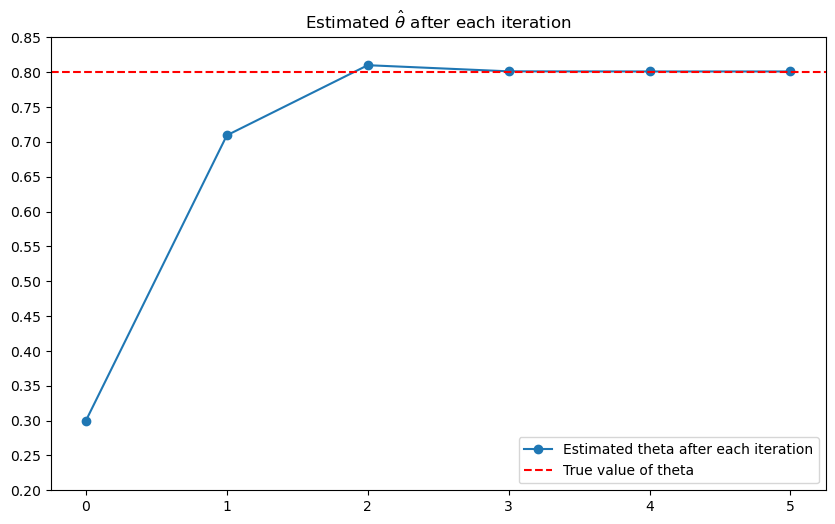

In [258]:
T = Gauss_Newton(y, 0.3, 0.0001)
n_it = len(T)

for i in range(n_it):
    print(f"Iteration {i}:  Estimated theta: {T[i]}  True theta: {true_theta}")

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(list(range(n_it)), T, marker="o")
plt.xticks(np.arange(0, n_it, 1))
plt.yticks(np.arange(round(min(T[0], T[-1]) - 0.1, 2), round(max(T[0], T[-1]) + 0.1, 2), 0.05))
plt.axhline(true_theta, color="r", linestyle="dashed")
plt.legend(["Estimated theta after each iteration", "True value of theta"], loc=4)
plt.title(r"Estimated $\hat{\theta}$ after each iteration")
plt.show()

As the output of our algorithm suggests and the graph illustrate, even with a "bad" starting value of $\hat{\theta}_0 = 0.3$ the algorithm converges quite quickly: already the second iteration has a value of $0.8099$. The final value $\hat{\theta} = 0.80095$ is extremely close to the true value $\theta = 0.8$.

Apart from the final estimate and the convergence graph, some useful indicators to assess the performance of an estimator are the Mean Squared Error and the Mean Absolute Error which are defined as follow:
$$ \text{MSE} = \frac{1}{T} \sum_{t=1}^{T} (y_t - \hat{y}_t)^2$$
$$ \text{MAE} = \frac{1}{T} \sum_{t=1}^{T} |y_t - \hat{y}_t|$$
Where:
- $T$ is the total number of observations
- $y_t$ is the $t^{th}$ observtion
- $\hat{y}_t$ is the fitted $t^{th}$ observation using our estimate

Obviously, the closest to $0$ the Mean Squared Error and the Mean Absolute Error are, the better. For this particular simulation with $\theta = 0.8$, $\hat{\theta}_0 = 0.3$ and the convergence criterion $|\theta_{j+1}-\theta_{j}| < 10^{-4}$, we obtain:

In [77]:
theta_hat = Gauss_Newton(y, 0.3, 0.0001)[-1]
y_hat, SE = [0] * n_obs, [0] * n_obs

for t in range(1, n_obs):
    y_hat[t] = theta_hat*w[t-1] + w[t]

print("The Mean Squared Error is:", np.square((np.array(y) - np.array(y_hat))).mean())
print("The Mean Absolute error is:", np.abs((np.array(y) - np.array(y_hat))).mean())

The Mean Squared Error is: 9.290902493461805e-07
The Mean Absolute error is: 0.0007678785485130285


### 4. Monte Carlo Simulation

Now to further investigate the asymptotic properties of the Gauss-Newton estimator, let us run 1000 simulations with a starting value $\hat{\theta}_0 = 0.5$.

In [ ]:
vec_theta = []
max_range = 1000

for i in range(max_range):
    w = np.random.normal(0, 1, n_obs)
    y = [0] * n_obs
    w[0] = y[0]
    for t in range(1, n_obs):
        y[t] = true_theta * w[t-1] + w[t]
    vec_theta.append(Gauss_Newton(y, 0.5,0.0001)[-1])

We can then plot the resulting histogram of our $\hat{\Theta}$ along with its empirical probability density function. And as demonstrated below, the Gauss-Newton estimator is definitely centered around the true value $\theta = 0.8$, as $E(\hat{\Theta}) = 0.8013$.  
Also, note that due to the smoothing of the empirical PDF (with $\lambda = 0.5$), its peak appears slightly displaced to the right of the actual mean of $\hat{\Theta}$.

Expected value of the vector Theta: 0.8013444875730051


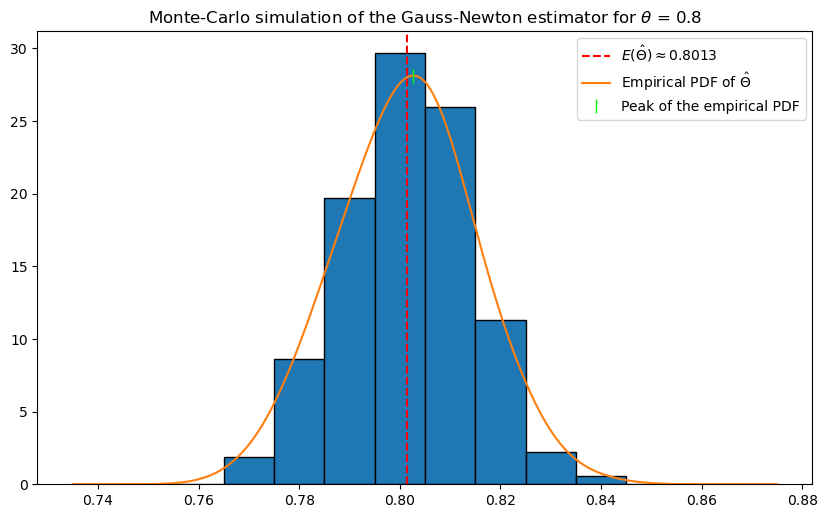

In [377]:
import scipy.stats as stats

print(f"Expected value of the vector Theta: {np.mean(vec_theta)}")

density = stats.gaussian_kde(vec_theta)
x_vals = np.linspace(0.735, 0.875, 1000)
density.covariance_factor = lambda : .5 #smoothing parameter
density._compute_covariance()
peak_emp_pdf = x_vals[[i for i in density(x_vals)].index([np.max(density(x_vals))])]

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(vec_theta, bins=np.arange(0.735, 0.875, 0.01), edgecolor="black", density=True)
plt.axvline(np.mean(vec_theta), color="r", linestyle="dashed", label=r"$E(\hat{\Theta}) \approx 0.8013$")
plt.plot(x_vals,density(x_vals), label=r"Empirical PDF of $\hat{\Theta}$")
plt.plot(peak_emp_pdf, density(peak_emp_pdf), "|", color="lime", markersize=10, label="Peak of the empirical PDF")

plt.legend()
plt.title(r"Monte-Carlo simulation of the Gauss-Newton estimator for $\theta$ = 0.8")
plt.show()

Using the 1000 generated estimates for $\theta$, we can compute several performance criteria measures such as:
$$ \text{Bias} \hspace{0.75cm} = \hspace{0.7cm} E(\hat{\theta})-\theta \hspace{0.7cm} = \hspace{0.6cm} \frac{1}{N} \sum_{i=1}^{N} (\hat{\theta}_n-\theta)$$
$$ \hspace{0.8cm} \text{Variance} \hspace{0.35cm} = \hspace{0.25cm} E[(\hat{\theta}-E(\hat{\theta})^2] \hspace{0.2cm} = \hspace{0.2cm} \frac{1}{N-1} \sum_{i=1}^{N} (\hat{\theta}_n-E(\hat{\theta}))^2$$
It is obvious from their definition that the bias measures the difference between the estimate and the true parameter while the variance measures the estimate's precision. Both measure are computed below, and for the sake of visual representation and better understanding of the range of the bias, a plot of the difference between the estimate and the true parameter for each iteration of the simulation is also provided.

Bias: 0.0013444875730050697
Variance: 0.0001638632893326993
Standard error: 0.01280090970723172


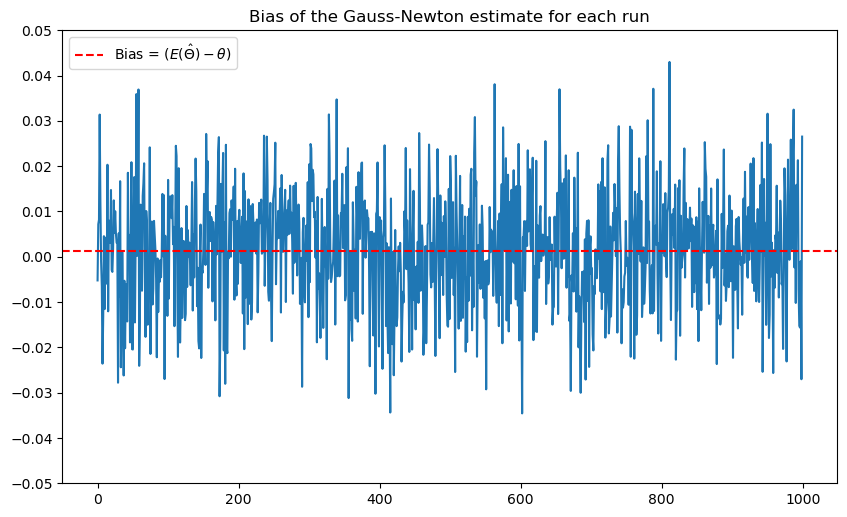

In [364]:
vec_true_theta = [true_theta]*len(vec_theta)
bias = np.array(vec_theta) - np.array(vec_true_theta)

print(f"Bias: {np.mean(bias)}")
print(f"Variance: {np.var(np.array(vec_theta), ddof=1)}")
print(f"Standard error: {np.sqrt(np.var(np.array(vec_theta), ddof=1))}")

fig = plt.figure(figsize=(10, 6), dpi=100, facecolor="w", edgecolor="k")
plt.plot(bias)
plt.yticks(np.arange(-0.05, 0.06, 0.01))
plt.axhline(np.mean(bias), color="r", linestyle="dashed", label=r"Bias = $(E(\hat{\Theta})-\theta)$")
plt.legend()
plt.title("Bias of the Gauss-Newton estimate for each run")
plt.show()

### 5. Conclusion

Throughout this Notebook we have seen the theoretical definition of the Gauss-Newton estimator and we derived it for a first order Moving Average process.  
We then implemented the algorithm and investigated its properties first through some common efficiency measures such as the Mean Square Error and the Mean Absolute Error, and then through a Monte Carlo simulation, where its empirical probability density function along with its sample mean and sample variance were computed.  
The results from our empirical assessment are regarded as satisfactory and the Gauss-Newton estimation procedure for the parameter estimation of a MA(1) process is considered a valid method.